In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [9]:
def fun(x):
    return 4 / (1 + x**2)

In [10]:
def gauss_legendre_integration(n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    
    x_values = 0.5 * (nodes + 1)
    
    fx_values = fun(x_values)
    
    integral_approx = np.sum(weights * fx_values)
    
    integral_approx *= 0.5
    
    return integral_approx

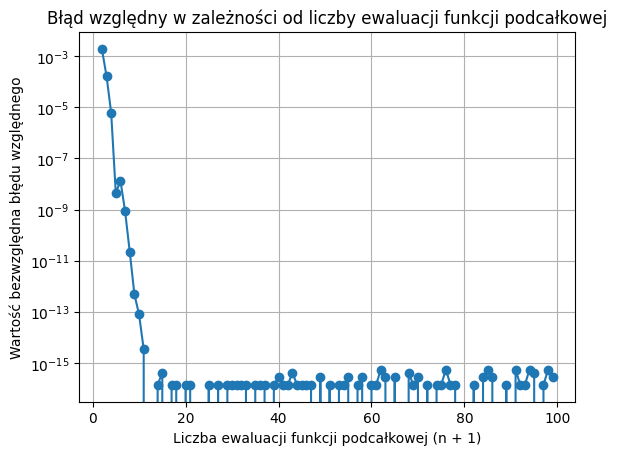

In [17]:
n_values = np.arange(2, 100)
errors = []

for n in n_values:
    integral_approx = gauss_legendre_integration(n)
    error = np.abs(np.pi - integral_approx) / np.pi
    errors.append(error)

plt.plot(n_values, errors, marker='o')
plt.yscale('log')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej (n + 1)')
plt.ylabel('Wartość bezwzględna błędu względnego')
plt.title('Błąd względny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.grid(True)
plt.show()